In [36]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Generate normally distributed values

# Set random seed for reproducibility
np.random.seed(42)

col_a = np.random.normal(3, 1, 90)
col_b = np.random.normal(3, 1, 90)
col_c = np.random.normal(3, 1, 90)
col_d = np.random.normal(3, 1, 90)

In [51]:
df = pd.DataFrame({
    'A': col_a,
    'B': col_b,
    'C': col_c,
    'D': col_d
})

In [52]:
df.head()

,A,B,C,D
0,3.496714,3.097078,3.625667,4.441273
1,2.861736,3.968645,2.142842,1.564138
2,3.647689,2.297947,1.929108,4.163164
3,4.523030,2.672338,3.482472,3.010233
4,2.765847,2.607892,2.776537,2.018491


## Summary Statistics

In [53]:
df.describe()

,A,B,C,D
count,90.000000,90.000000,90.000000,90.000000
mean,2.901192,3.054526,2.990066,3.060831
std,0.934949,0.964222,1.076262,0.812872
min,0.380255,1.081229,-0.241267,1.047912
25%,2.398560,2.288723,2.237789,2.437161
50%,2.873044,3.082820,3.061244,3.045403
75%,3.509129,3.570628,3.647023,3.627289
max,4.852278,5.720169,6.852731,5.133033


## Data Visualization


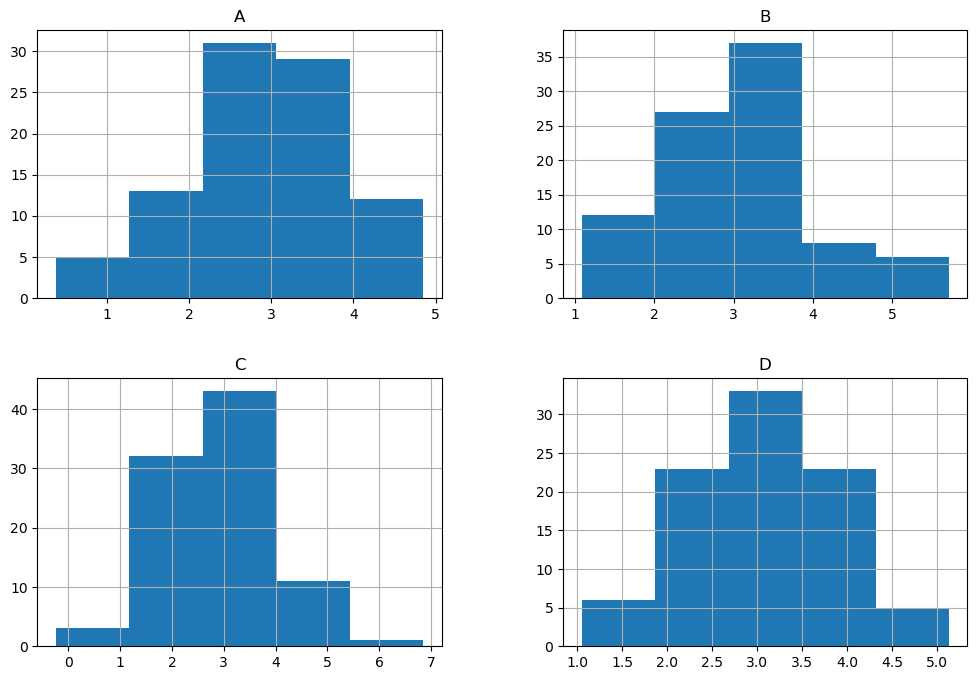

In [54]:
df.hist(bins=5, figsize=(12, 8))
plt.show()

## Normality Tests

One popular test for normality is the Shapiro-Wilk test. The null hypothesis for this test is that the data is normally distributed. If the p-value is less than a predetermined significance level (often set at 0.05), the null hypothesis is rejected, indicating that the data significantly deviate from a normal distribution. Conversely, if the p-value is larger than the significance level, you fail to reject the null hypothesis, and there's not enough evidence to say that the data is not normally distributed.

### Interpretation
Here's how you can interpret the results:

- p-value < 0.05: Reject the null hypothesis, data is not normally distributed.
- p-value >= 0.05: Fail to reject the null hypothesis, data is normally distributed (or at least not sufficiently deviating from normality).

In [55]:
from scipy.stats import shapiro

def check_normality(df):
    for col in df.columns:
        stat, p = shapiro(df[col])
        if p > 0.05:
            print(f"The data in column {col} is normally distributed. Statistic={stat}, p-value={p}")
        else:
            print(f"The data in column {col} is not normally distributed. Statistic={stat}, p-value={p}")

# Assuming df is your DataFrame
check_normality(df)


The data in column A is normally distributed. Statistic=0.9893923401832581, p-value=0.686398446559906
The data in column B is normally distributed. Statistic=0.9810462594032288, p-value=0.21345703303813934
The data in column C is normally distributed. Statistic=0.977764368057251, p-value=0.1257535219192505
The data in column D is normally distributed. Statistic=0.9941883683204651, p-value=0.9650660753250122


`stat` is the test statistic. Values close to 1 indicate that the data is normally distributed